In [1]:
!nvidia-smi -L

GPU 0: NVIDIA GeForce RTX 3090 (UUID: GPU-8c5f31c0-aec4-5828-1fc6-24bd25119294)
GPU 1: NVIDIA GeForce RTX 3090 (UUID: GPU-99ffc975-a6e6-3d71-c76b-0fc2d35723ad)


In [2]:
#@title Setup
%cd ./BLIP

import torch
import torchvision.transforms as T
import torchvision.transforms.functional as TF
from PIL import Image
from models.blip import blip_decoder

# Set device
device = 'cuda'

# Set constants
size = 384
url = 'https://storage.googleapis.com/sfr-vision-language-research/BLIP/models/model*_base_caption.pth'

# Load BLIP model
blip = blip_decoder(pretrained=url, image_size=size, vit='base')
blip.eval()
blip = blip.to(device)


/home/arty/clip-interrogator/BLIP


/home/arty/miniconda3/envs/camus/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


load checkpoint from https://storage.googleapis.com/sfr-vision-language-research/BLIP/models/model*_base_caption.pth


In [3]:
def generate_caption(pil_image):
    # Preprocess image
    input_image = T.Compose([
        T.Resize((size, size), interpolation=TF.InterpolationMode.BICUBIC),
        T.ToTensor(),
        T.Normalize((0.48145466, 0.4578275, 0.40821073), (0.26862954, 0.26130258, 0.27577711))
    ])(pil_image).unsqueeze(0).to(device)

    # Generate caption
    with torch.no_grad():
        caption = blip.generate(input_image, sample=False, num_beams=3, max_length=1000, min_length=100)
        
    return caption[0]

def interrogate(image, models=[]):
    # Generate caption
    caption = generate_caption(image)
    print(f"\n\n{caption}")
    
    # If no models are provided, return
    if not models:
        return
    
    # Set up bests and flaves
    bests = [[('',0)]]*5
    flaves = ', '.join([f"{x[0]}" for x in bests[4]])
    
    # Set up medium
    medium = bests[0][0][0]


In [12]:
image = "../screen.png"

In [13]:
image = Image.open(image).convert('RGB')

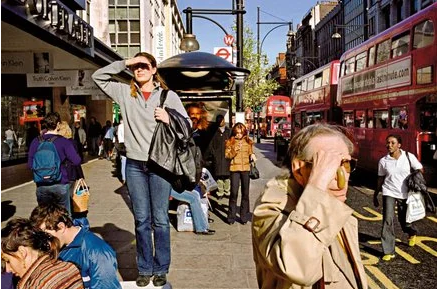

In [14]:
image

In [15]:
ViTB32 = True
models = []
if ViTB32: models.append('ViT-B/32')
   

In [16]:
interrogate(image, models=models)



a group of people walking down a street next to a red double decker bus and a woman eating a hot dog with her hand up to her ear and a man holding a cell phone up to her ear with both of the other side of the other side of the man's ear, and a, with a, and a, and a, and a, and another, another, another, another, another, another, another, another, another, another, another, another
